<!> INI ADALAH PROGRAM AUTOMATIC CLUSTERING <!>
Note: Pastikan menggunakan dataset yang dipilih telah berbentuk numerik
      Hilangkan label apabila terdapat di dalamnya dan gunakan nama kolom
      saja di dalam dataset

Metode Cluster
1.K-Means
Cluster(1): 1
Masukkan nama data yang digunakan: milk
Masukkan banyak cluster yang diinginkan: 5

Kolom yang tersedia dalam dataset:
pH
Temprature
Taste
Odor
Fat 
Turbidity
Colour
Grade
Masukkan kolom yang ingin di dropGrade
Ingin mengulang?t


/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

Kolom yang tersedia dalam dataset:
pH
Temprature
Taste
Odor
Fat 
Turbidity
Colour
Masukkan Nama kolom yang ingin divisualisasipH
Masukkan Nama kolom yang ingin divisualisasiColour


/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

Number of Clusters | Variance Between | Variance Within
          1        |             0.00 |      130615.04
          2        |           430.58 |       54785.81
          3        |             7.97 |       37719.10
          4        |            92.22 |       25943.67
          5        |          2106.54 |       17694.17


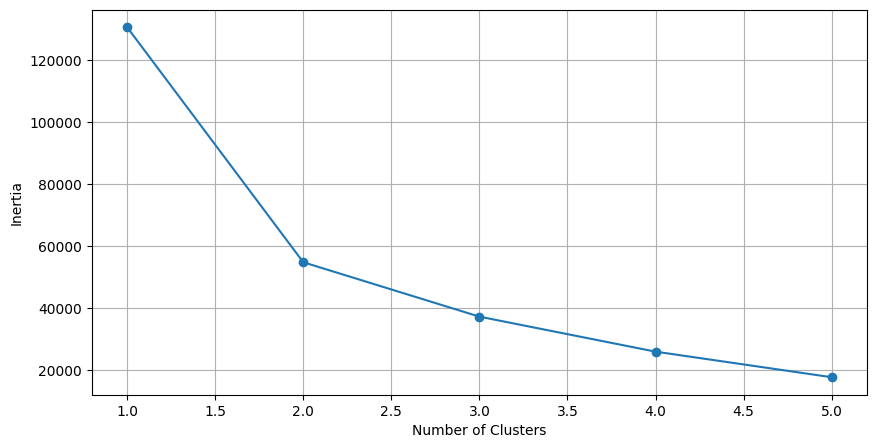

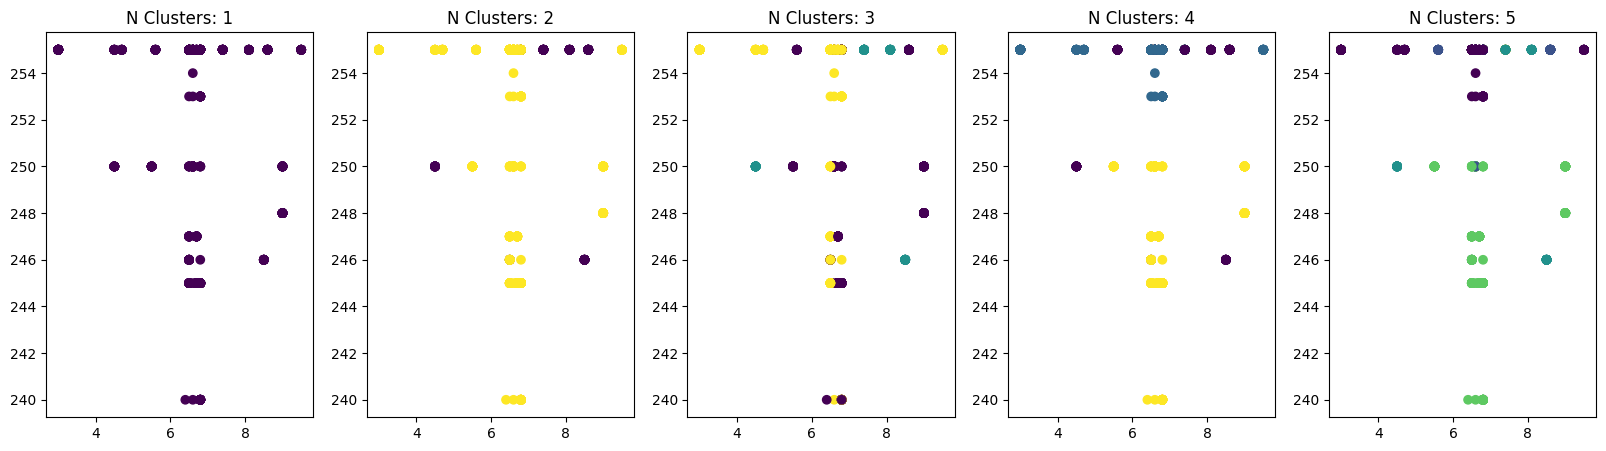

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
 
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k + 1): 
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, "o-")
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)

print("""<!> INI ADALAH PROGRAM AUTOMATIC CLUSTERING <!>
Note: Pastikan menggunakan dataset yang dipilih telah berbentuk numerik
      Hilangkan label apabila terdapat di dalamnya dan gunakan nama kolom
      saja di dalam dataset""")

pilih = int(input("\nMetode Cluster\n1.K-Means\nCluster(1): "))
if pilih == 1:
    data = str(input("Masukkan nama data yang digunakan: "))
    k_cluster = int(input("Masukkan banyak cluster yang diinginkan: "))
     
    dataset = pd.read_csv(data+".csv")
    column = []
    print("\nKolom yang tersedia dalam dataset:")
    for col in dataset.columns:
        print(col)
    while True:
        kolom = input("Masukkan kolom yang ingin di drop")
        column.append(kolom)
        pilihan = input("Ingin mengulang?")
        if pilihan == 't':
            break
    dataset = dataset.drop(columns=column) 
    dataset = dataset.fillna(dataset.mean())
    dataset = dataset.iloc[:,:]
    var_bet = np.array(dataset) 
    sc = StandardScaler()
    var_df = dataset.iloc[:,:]
    df = dataset.iloc[:,:]
    df_tf = sc.fit_transform(df) 
    optimise_k_means(df, k_cluster)
    kmeans = KMeans(k_cluster)
    kmeans.fit(df.iloc[:,:])
    df[f'KMeans_{k_cluster}'] = kmeans.labels_
    
    for k in range (1,k_cluster+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(var_df)
        df[f'KMeans_{k}'] = kmeans.labels_
        
    print("Kolom yang tersedia dalam dataset:")
    for col in dataset.columns:
        print(col)
        
    satu = input("Masukkan Nama kolom yang ingin divisualisasi")
    dua = input("Masukkan Nama kolom yang ingin divisualisasi")
    fig, axs = plt.subplots(nrows=1,ncols=k_cluster,figsize=(20,5))
    for i, ax in enumerate(fig.axes,start=1):
        ax.scatter(x=df[satu], y=df[dua], c=df[f'KMeans_{i}'])
        ax.set_title(f'N Clusters: {i}')
    
    # Calculate error, variance between, and variance within
    errors = []
    variance_between = []
    variance_within = []

    for k in range(1, k_cluster + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(var_df)

        cluster_centers = kmeans.cluster_centers_
        labels = kmeans.labels_

        error = 0
        for i in range(k):
            global_center = np.mean(var_df, axis=0)
            cluster_points = var_df[labels == i].iloc[:,:]
            error += ((cluster_points - cluster_centers[i]) ** 2).sum().sum()

            # Hitung jarak antara pusat cluster dan pusat cluster global
            distances = np.linalg.norm(cluster_centers[i] - global_center, axis=0)          
            # Kuadratkan jarak
            squared_distances = distances**2

        total_error = ((var_df - cluster_centers[labels]) ** 2).sum().sum()
        within_cluster_var = error
        
        # Hitung variance between clusters
        variance_between_clusters = np.sum(squared_distances)
    
        errors.append(total_error)
        variance_between.append(variance_between_clusters)
        variance_within.append(within_cluster_var)

    # Print the errors, variance between, and variance within
    print("Number of Clusters | Variance Between | Variance Within")
    for k in range(k_cluster):
        print(f"         {k+1:2d}        |  {variance_between[k]:15.2f} | {variance_within[k]:14.2f}")